# Lab 9

Find the best set of hyperparameters (n_neighbors and metric) of k-NN model for classification of the iris dataset (attached), with respect to the target variable "variety". 

- k search space: Use odd k values in [1,7].

- metric search space: three distance metrics of your choice.

## Import Libraries



In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Get the Data(Iris dataset)



In [62]:
df = pd.read_csv("iris-KNN.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Standardize the Variables



In [63]:
X = df.drop('variety', axis=1)
y = df['variety']

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

df_feat = pd.DataFrame(scaled_features, columns=X.columns)
df_feat.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.581066,0.841837,-1.012978,-1.042111
1,-0.894309,-0.207835,-1.012978,-1.042111
2,-1.207552,0.212034,-1.082312,-1.042111
3,-1.364174,0.002099,-0.943643,-1.042111
4,-0.737687,1.051772,-1.012978,-1.042111


## Train Test Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2)

## Models



In [65]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(pred)

[1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0]


## Predictions and Evaluations



In [66]:
print(confusion_matrix(y_test, pred))

[[6 2]
 [3 9]]


In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.82      0.75      0.78        12

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



## Choosing best hyperparameters



In [68]:
error_rate = []
plt_range = []

for i in range(1, 9, 2):
    for x in ["euclidean", "manhattan", "minkowski"]:
        plt_range.append(str(i) + " " + x)
        knn = KNeighborsClassifier(n_neighbors=i, metric=x)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

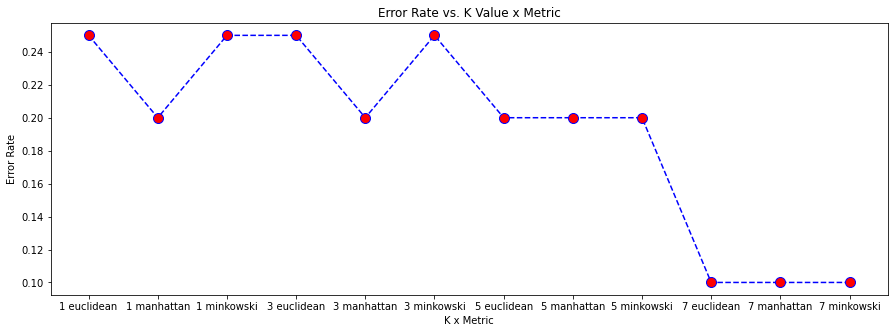

In [69]:
plt.figure(figsize=(15,5))
plt.plot(plt_range, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value x Metric')
plt.xlabel('K x Metric')
plt.ylabel('Error Rate')

In [70]:
# K = 7, metric can be manhattan
knn = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("K = 7, metric can be manhattan")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

K = 7, metric can be manhattan
[[ 7  1]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

